<a href="https://colab.research.google.com/github/runtorain/tomato/blob/main/Tomato_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#0.Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/AI_Project/kaggle.json ~/.kaggle/     # แก้ไข Path ของ file kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
##https://www.kaggle.com/datasets/enalis/tomatoes-dataset

In [ ]:
!kaggle datasets download enalis/tomatoes-dataset

Dataset URL: https://www.kaggle.com/datasets/enalis/tomatoes-dataset
License(s): CC0-1.0
 86% 81.0M/93.7M [00:01<00:00, 93.4MB/s]
100% 93.7M/93.7M [00:01<00:00, 89.8MB/s]


In [ ]:
!unzip /content/tomatoes-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: content/ieee-mbl-cls/train/Old/o (280).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (281).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (282).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (283).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (284).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (285).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (287).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (288).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (29).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (290).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (291).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (292).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (294).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (295).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (296).jpg  
  inflating: content/ieee-mbl-cls/train/Old/o (297).jpg  
  inflating: content/i

# 1.Data Visualization

In [ ]:
# prompt: show all q'ty image in subfolder of /content/Data

import os

def count_images(folder_path):
  for subfolder in os.listdir(folder_path):
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.isdir(subfolder_path):
      num_images = len([f for f in os.listdir(subfolder_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
      print(f"Subfolder '{subfolder}': {num_images} images")

count_images('/content/content/ieee-mbl-cls/train')


Subfolder 'Ripe': 1975 images
Subfolder 'Damaged': 949 images
Subfolder 'Unripe': 1584 images
Subfolder 'Old': 1992 images


In [ ]:
count_images("/content/content/ieee-mbl-cls/train")

Subfolder 'Ripe': 1975 images
Subfolder 'Damaged': 949 images
Subfolder 'Unripe': 1584 images
Subfolder 'Old': 1992 images


In [ ]:
count_images("/content/content/ieee-mbl-cls/val")

Subfolder 'Ripe': 220 images
Subfolder 'Damaged': 106 images
Subfolder 'Unripe': 176 images
Subfolder 'Old': 222 images


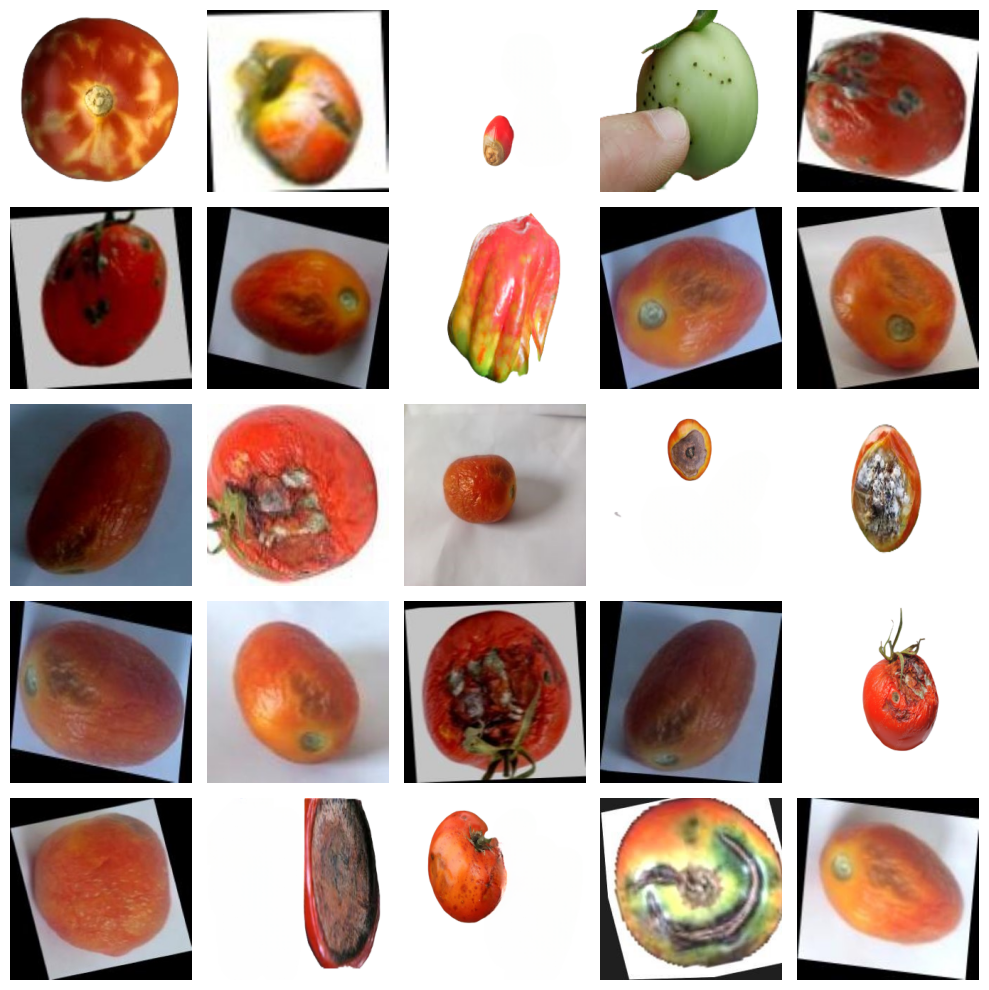

In [ ]:
# prompt: sampling image in /content/content/ieee-mbl-cls/train/Damaged  and show 5x5 small image

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Path to the folder containing images
folder_path = '/content/content/ieee-mbl-cls/train/Damaged'

# Get a list of image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Randomly select 25 images
selected_images = random.sample(image_files, 25)

# Create a 5x5 grid of subplots
fig, axes = plt.subplots(5, 5, figsize=(10, 10))

# Display the selected images
for i, image_file in enumerate(selected_images):
  row = i // 5
  col = i % 5
  image_path = os.path.join(folder_path, image_file)
  img = mpimg.imread(image_path)
  axes[row, col].imshow(img)
  axes[row, col].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
def show_image(image_folder):

  folder_path = image_folder
  # Get a list of image files in the folder
  image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

  # Randomly select 25 images
  selected_images = random.sample(image_files, 25)

  # Create a 5x5 grid of subplots
  fig, axes = plt.subplots(5, 5, figsize=(10, 10))

  # Display the selected images
  for i, image_file in enumerate(selected_images):
    row = i // 5
    col = i % 5
    image_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(image_path)
    axes[row, col].imshow(img)
    axes[row, col].axis('off')

  plt.tight_layout()
  plt.show()

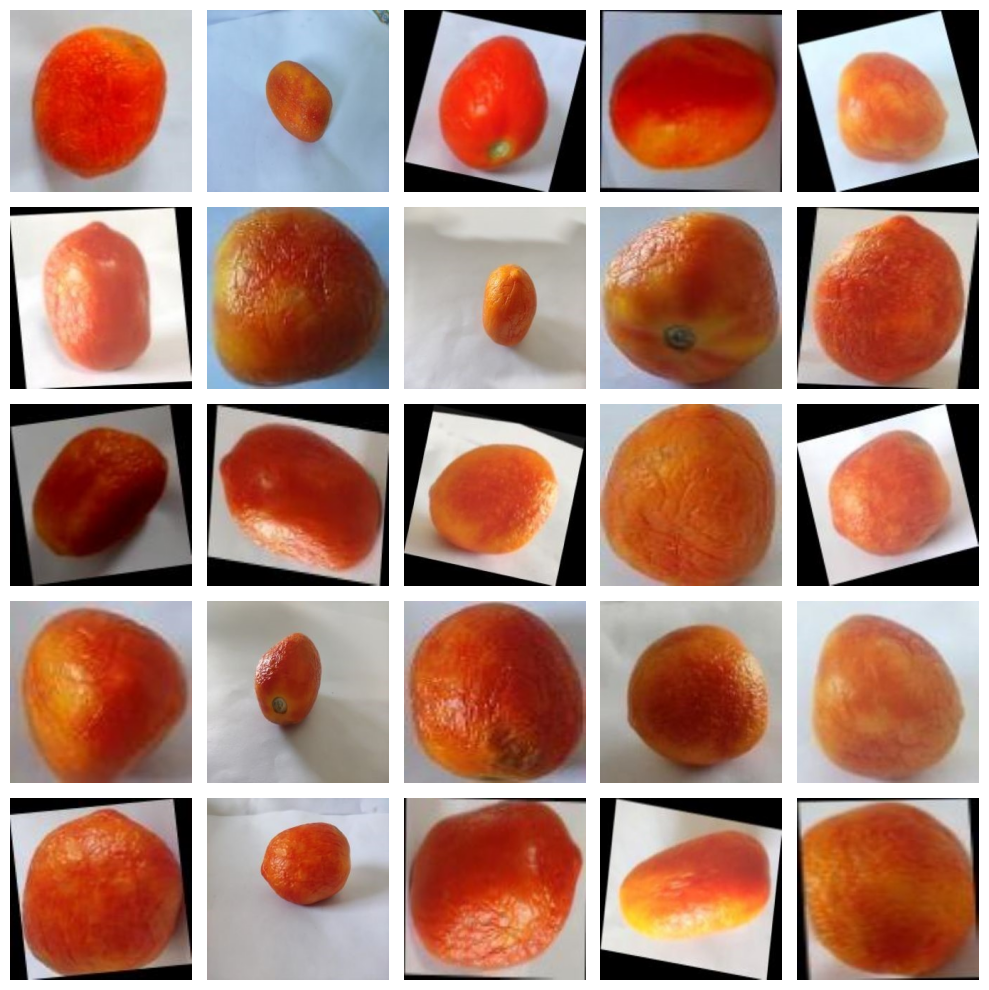

In [ ]:
show_image("/content/content/ieee-mbl-cls/train/Old")

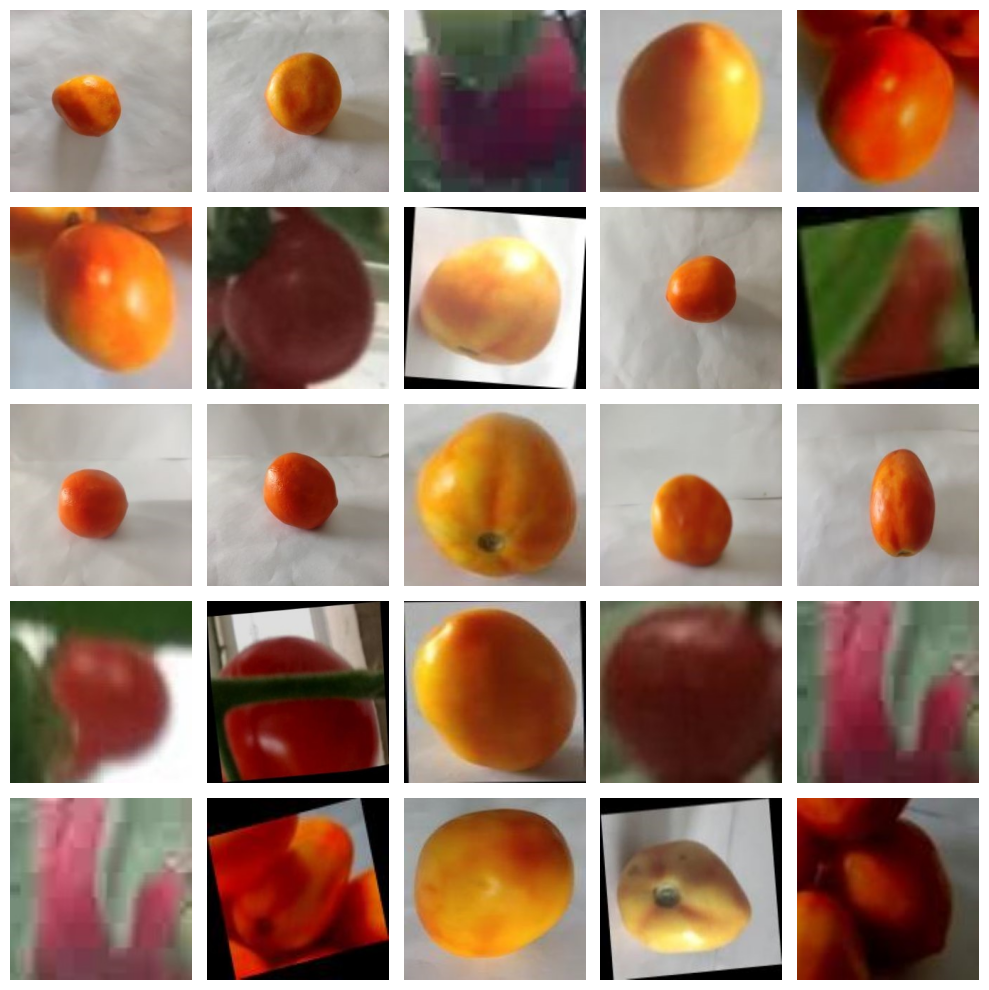

In [ ]:
show_image("/content/content/ieee-mbl-cls/train/Ripe")

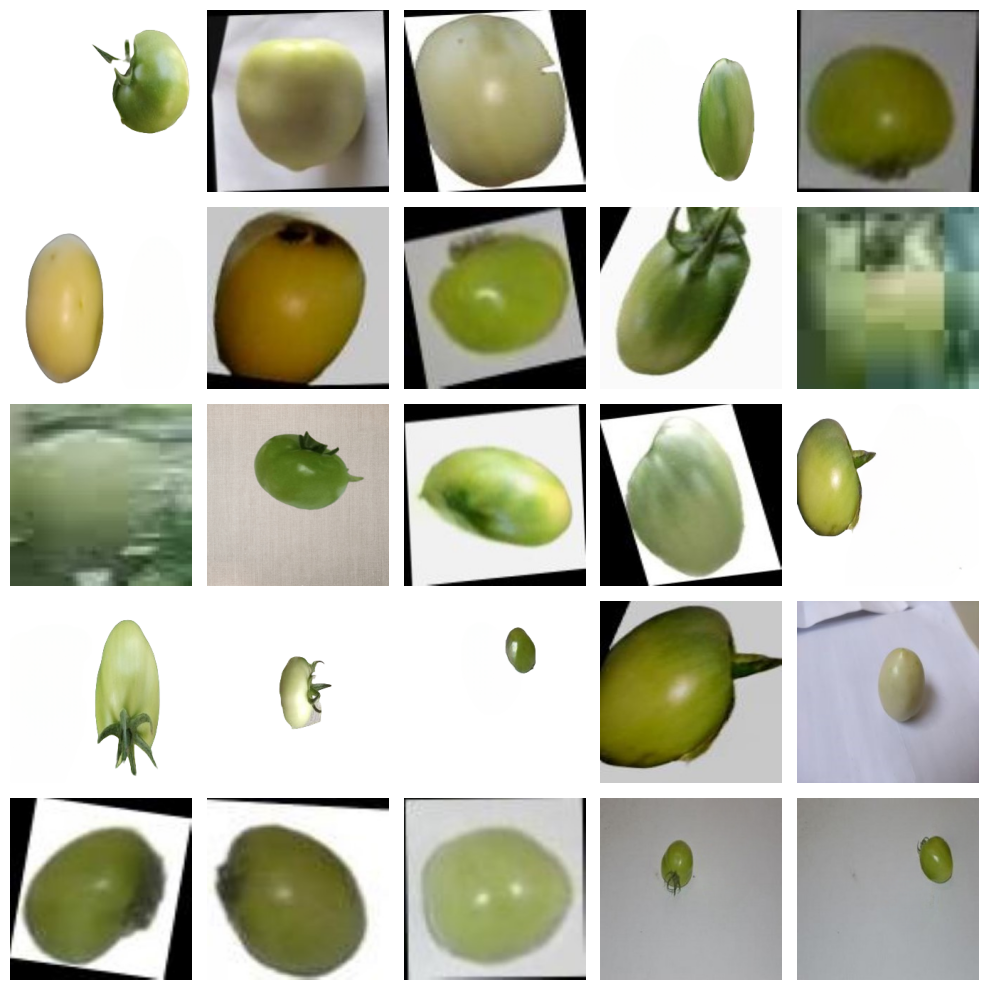

In [ ]:
show_image('/content/content/ieee-mbl-cls/train/Unripe')

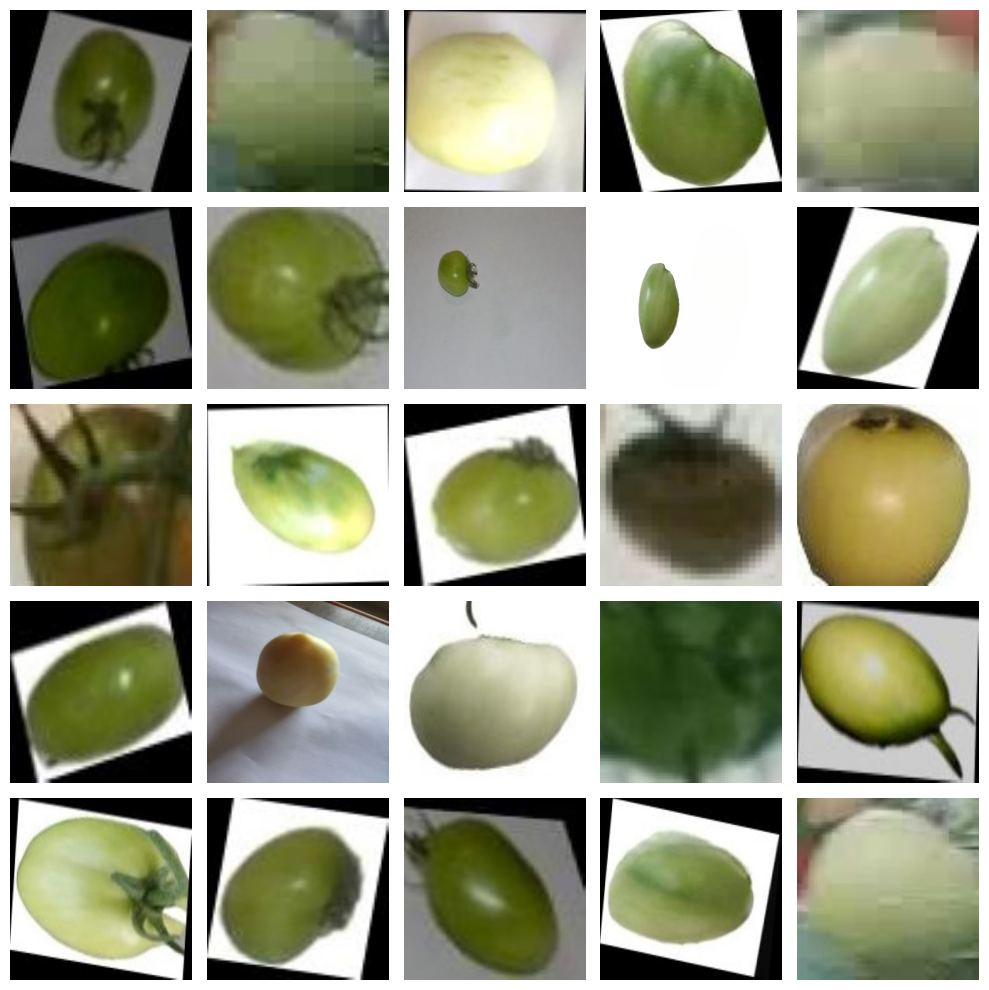

In [ ]:
show_image('/content/content/ieee-mbl-cls/train/Unripe')

#2. Training

## 2.1 Load Model

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import AutoImageProcessor, AutoModelForImageClassification, TrainingArguments, Trainer
from PIL import Image

# Load pre-trained processor and model
processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

##2.1 Datasets and dataloader preparation

In [ ]:
# Define the dataset paths
train_dir = "/content/content/ieee-mbl-cls/train"
val_dir = "/content/content/ieee-mbl-cls/val"

In [ ]:
# Define the transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=processor.image_mean, std=processor.image_std)
])

In [ ]:
# Load the datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

In [ ]:
len(train_dataset), len(val_dataset)

(6500, 724)

In [ ]:
# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

##2.3 Train Model

In [ ]:
# Define a training function
def train_model(model, train_loader, val_loader, epochs=10, lr=5e-5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(pixel_values=inputs).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(pixel_values=inputs).logits
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Validation Accuracy: {100 * correct / total}%")

    return model

In [ ]:
# prompt: train_model with tqdm

from tqdm import tqdm

# Define a training function
def train_model(model, train_loader, val_loader, epochs=3, lr=5e-5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
    criterion = torch.nn.CrossEntropyLoss()

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(pixel_values=inputs).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader)}")

        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in tqdm(val_loader, desc="Validation"):
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(pixel_values=inputs).logits
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        print(f"Validation Accuracy: {100 * correct / total}%")

    return model
# Train the model
trained_model = train_model(model, train_loader, val_loader)


Epoch 1/3: 100%|██████████| 204/204 [03:43<00:00,  1.09s/it]


Epoch 1/3, Loss: 0.022163783539255355


Validation: 100%|██████████| 23/23 [00:09<00:00,  2.52it/s]


Validation Accuracy: 97.23756906077348%


Epoch 2/3: 100%|██████████| 204/204 [03:41<00:00,  1.09s/it]


Epoch 2/3, Loss: 0.019015232653698914


Validation: 100%|██████████| 23/23 [00:09<00:00,  2.51it/s]


Validation Accuracy: 98.75690607734806%


Epoch 3/3: 100%|██████████| 204/204 [03:41<00:00,  1.09s/it]


Epoch 3/3, Loss: 0.005580637223829399


Validation: 100%|██████████| 23/23 [00:09<00:00,  2.56it/s]

Validation Accuracy: 99.03314917127072%


# 3 Result

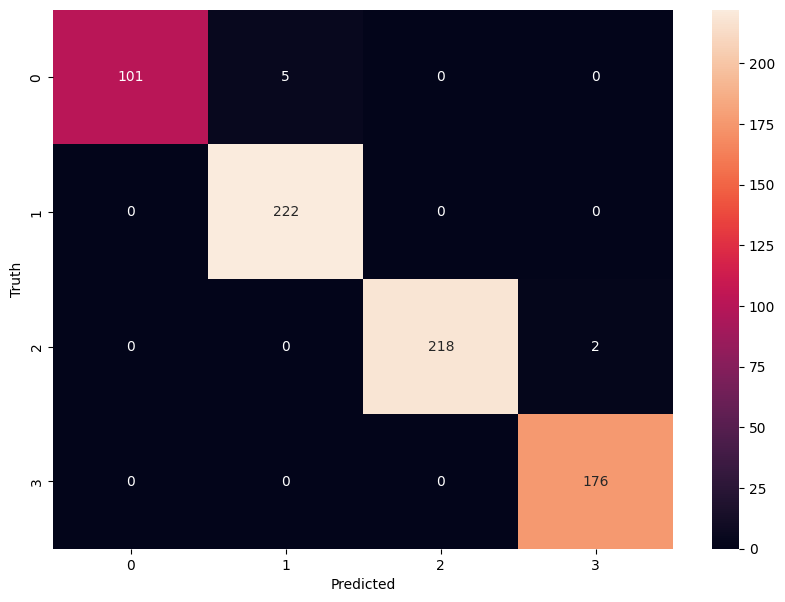

In [ ]:
# prompt: making making confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np


def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(pixel_values=inputs).logits
            _, predicted = torch.max(outputs, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return all_preds, all_labels

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y_pred, y_true = evaluate_model(trained_model, val_loader, device)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


## 3.1 Making Inference

In [ ]:
# Access and print class names
class_names = train_dataset.classes
print(f"Class names: {class_names}")

Class names: ['Damaged', 'Old', 'Ripe', 'Unripe']


In [ ]:
# prompt: making Inference function by input image path  return pridict class , labels and confidance

def predict_image(model, image_path, processor, class_names):
  """
  Predicts the class of an image.

  Args:
    model: The trained PyTorch model.
    image_path: The path to the image file.
    processor: The image processor used for preprocessing.
    class_names: A list of class names.

  Returns:
    A tuple containing:
      - The predicted class label.
      - The human-readable class name.
      - The confidence score of the prediction.
  """
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  model.eval()

  image = Image.open(image_path)
  inputs = processor(images=image, return_tensors="pt").to(device)

  with torch.no_grad():
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class_idx = torch.argmax(probabilities).item()
    confidence = probabilities[0, predicted_class_idx].item()

  predicted_class_label = predicted_class_idx
  predicted_class_name = class_names[predicted_class_idx]

  return predicted_class_label, predicted_class_name, confidence

# Example usage:
class_names = train_dataset.classes  # Assuming you have the class names from your dataset
image_path = "/content/content/ieee-mbl-cls/val/Damaged/d (104).jpg"  # Replace with the actual image path

predicted_label, predicted_name, confidence = predict_image(trained_model, image_path, processor, class_names)

print(f"Predicted Label: {predicted_label}")
print(f"Predicted Class: {predicted_name}")
print(f"Confidence: {confidence:.4f}")


Predicted Label: 0
Predicted Class: Damaged
Confidence: 0.9997


In [ ]:
# Example usage:
class_names = train_dataset.classes  # Assuming you have the class names from your dataset
image_path = "/content/content/ieee-mbl-cls/val/Unripe/u (1087).jpg"  # Replace with the actual image path

predicted_label, predicted_name, confidence = predict_image(trained_model, image_path, processor, class_names)

print(f"Predicted Label: {predicted_label}")
print(f"Predicted Class: {predicted_name}")
print(f"Confidence: {confidence:.4f}")

Predicted Label: 3
Predicted Class: Unripe
Confidence: 0.9998


## 3.2 Save Model

In [ ]:
# Save the trained model
save_directory = "./trained_model"
trained_model.save_pretrained(save_directory)
processor.save_pretrained(save_directory)

['./trained_model/preprocessor_config.json']

## 3.3 Load Model

In [ ]:
from transformers import AutoModelForImageClassification, AutoImageProcessor

# Load the saved model and processor
loaded_model = AutoModelForImageClassification.from_pretrained(save_directory)
loaded_processor = AutoImageProcessor.from_pretrained(save_directory)

In [ ]:
# Example usage:
class_names = train_dataset.classes  # Assuming you have the class names from your dataset
image_path = "/content/content/ieee-mbl-cls/val/Unripe/u (1087).jpg"  # Replace with the actual image path

predicted_label, predicted_name, confidence = predict_image(loaded_model, image_path, loaded_processor, class_names)

print(f"Predicted Label: {predicted_label}")
print(f"Predicted Class: {predicted_name}")
print(f"Confidence: {confidence:.4f}")

Predicted Label: 3
Predicted Class: Unripe
Confidence: 0.9998


In [ ]:
# prompt: how i also check inferance time
# predicted_label, predicted_name, confidence = predict_image(loaded_model, image_path, loaded_processor, class_names)

import time

def predict_image(model, image_path, processor, class_names):
  """
  Predicts the class of an image.

  Args:
    model: The trained PyTorch model.
    image_path: The path to the image file.
    processor: The image processor used for preprocessing.
    class_names: A list of class names.

  Returns:
    A tuple containing:
      - The predicted class label.
      - The human-readable class name.
      - The confidence score of the prediction.
      - The inference time in seconds.
  """
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  model.to(device)
  model.eval()

  image = Image.open(image_path)

  start_time = time.time()  # Start measuring inference time

  inputs = processor(images=image, return_tensors="pt").to(device)

  with torch.no_grad():
    outputs = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_class_idx = torch.argmax(probabilities).item()
    confidence = probabilities[0, predicted_class_idx].item()

  end_time = time.time()  # Stop measuring inference time
  inference_time = end_time - start_time

  predicted_class_label = predicted_class_idx
  predicted_class_name = class_names[predicted_class_idx]

  return predicted_class_label, predicted_class_name, confidence, inference_time

# ... (Your existing code) ...

# Example usage:
predicted_label, predicted_name, confidence, inference_time = predict_image(loaded_model, image_path, loaded_processor, class_names)

print(f"Predicted Label: {predicted_label}")
print(f"Predicted Class: {predicted_name}")
print(f"Confidence: {confidence:.4f}")
print(f"Inference Time: {inference_time:.4f} seconds")


Predicted Label: 3
Predicted Class: Unripe
Confidence: 0.9998
Inference Time: 0.0292 seconds
